In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [81]:
df=pd.read_csv('C:/Users/LVC/Documents/25project/Time_series/perrin-freres-monthly-champagne-.csv')

In [82]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [83]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [84]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [85]:
df.dropna(inplace=True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [86]:
df.shape

(105, 2)

In [87]:
df['Month']=pd.to_datetime(df['Month'])

In [88]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [89]:
df=df.set_index('Month')

In [90]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

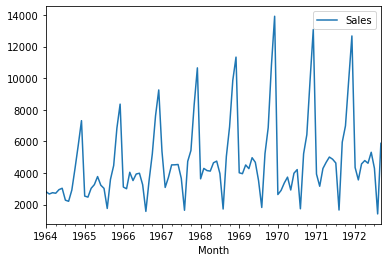

In [91]:
df.plot()

In [92]:
#!pip install statsmodels

## Tim P-value => nullhypothesis or alternative hypothesis

In [93]:
from statsmodels.tsa.stattools import adfuller

In [94]:
adfuller(df['Sales'])

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [95]:
def adfuller_test(sales):
    result=adfuller(sales)
    
    labels=['ADF test statistic','p-value','Lag used','Number of obs used']
    
    for value,label in zip(result,labels):
        print('{} :{}'.format(label,value))
    if result[1] <=0.05:
        print('Strong evidence against nullhypothesis,reject the null hypo, & data is stationary')
    else:
        print('Weak evidence against nullhypothesis,accept the null hypo, & data is not stationary')
    
    

In [96]:
adfuller_test(df['Sales'])

ADF test statistic :-1.8335930563276297
p-value :0.3639157716602417
Lag used :11
Number of obs used :93
Weak evidence against nullhypothesis,accept the null hypo, & data is not stationary


## Tinh chenh lech giua cac thang

In [97]:
## df.shift(i)dịch chuyển toàn bộ khung dữ liệu theo i đơn vị xuống
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [98]:
# so voi thang truoc
df['Sales first diff.']=df['Sales']-df['Sales'].shift(1)
df.head()

,Sales,Sales first diff.
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [99]:
# so voi nam truoc
df['Seasonal first diff.']=df['Sales']-df['Sales'].shift(12)
df.head()

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [100]:
adfuller_test(df['Seasonal first diff.'].dropna())

ADF test statistic :-7.626619157213163
p-value :2.060579696813685e-11
Lag used :0
Number of obs used :92
Strong evidence against nullhypothesis,reject the null hypo, & data is stationary


<AxesSubplot:xlabel='Month'>

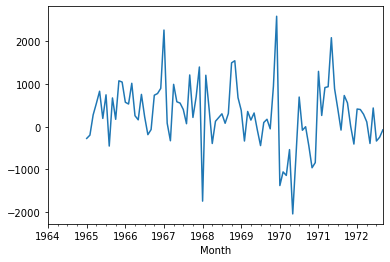

In [101]:
df['Seasonal first diff.'].plot()

## Arima


In [102]:
## (p,d,g)
#p- pacf graph
#d =1 (=time use shift)
#q- acf graph

In [103]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

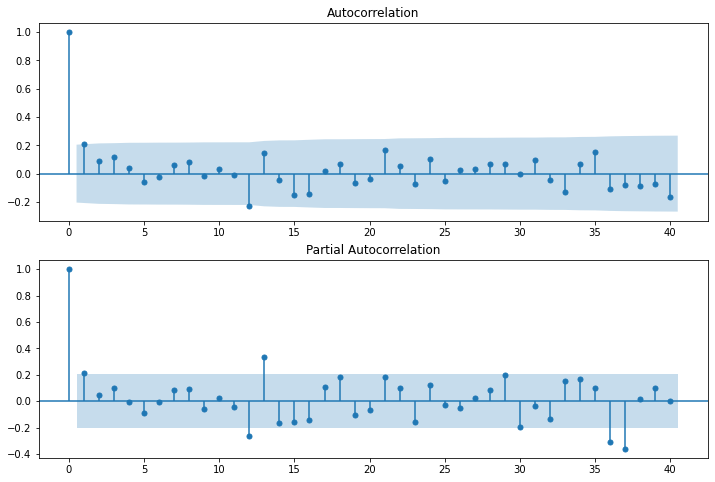

In [109]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211) 
fig=plot_acf(df['Seasonal first diff.'].iloc[13:],lags=40,ax=ax1)

ax2=fig.add_subplot(212)
fig=plot_pacf(df['Seasonal first diff.'].iloc[13:],lags=40,ax=ax2)
##lags<= number of sample/2
##iloc[13:] cause 13 have value
## fig.add_subplot
#ROW=number of rows
#COLUMN=number of columns
#POSITION= position of the graph you are plotting

## With autocorrelation : at lag=1 it touch blue region , q=1
## With partial autocorrelation : at lag=1 it touch blue region , p=1
## With once use shifting: d=1

In [110]:
from statsmodels.tsa.arima_model import ARIMA

In [111]:
model=ARIMA(df['Sales'],order=(1,1,1))
# order(p,d,q)

In [112]:
model=model.fit()

In [115]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sun, 03 Oct 2021   AIC                           1910.251
Time:                        17:21:32   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7853     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [116]:
df.shape

(105, 3)

In [120]:
df['forecast']=model.predict(start=90,end=103,dynamic=True)

In [121]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,473.093408
1971-08-01,1659.0,-2974.0,-79.0,218.374684
1971-09-01,5951.0,4292.0,730.0,107.738696
1971-10-01,6981.0,1030.0,557.0,59.684427


<AxesSubplot:xlabel='Month'>

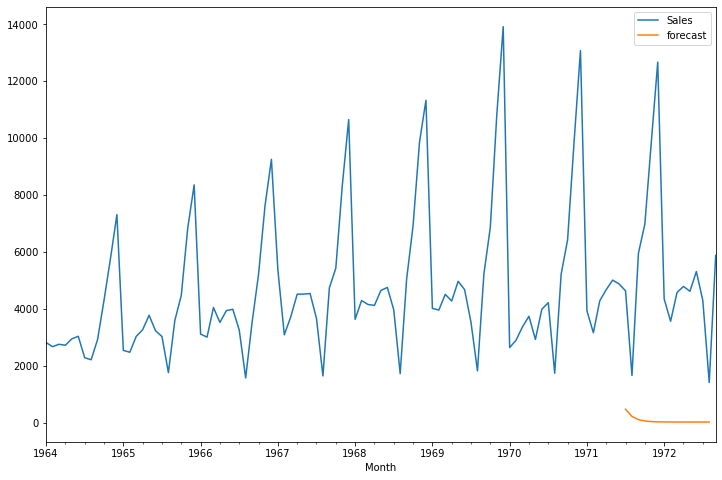

In [126]:
df[['Sales','forecast']].plot(figsize=(12,8))

## the predict is base on Seasonal Sale
## so we must use SARIMAX 

In [127]:
import statsmodels.api as sm

In [129]:
model1=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
## input(p,d,q) in order|(p,d,f Shift) value in seasonal_order

In [130]:
result=model1.fit()

In [131]:
df['forecast_SARIMAX']=result.predict(start=90,end=103,dynamic=True )

In [133]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,473.093408,4437.323750
1971-08-01,1659.0,-2974.0,-79.0,218.374684,2050.747346
1971-09-01,5951.0,4292.0,730.0,107.738696,5493.376291
1971-10-01,6981.0,1030.0,557.0,59.684427,6752.039282


<AxesSubplot:xlabel='Month'>

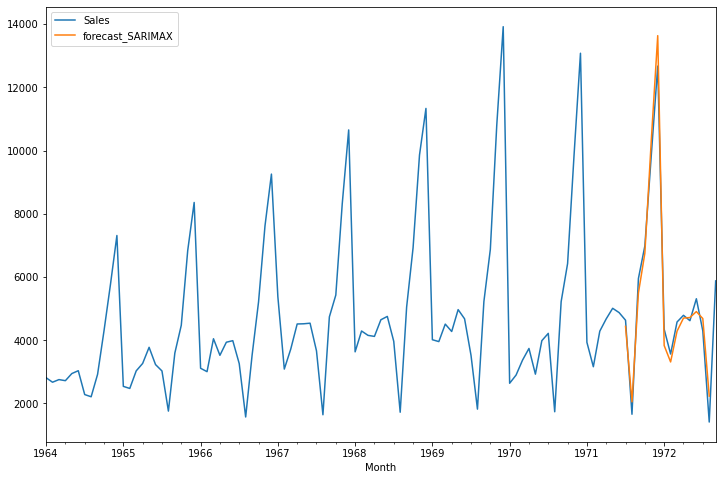

In [134]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,8))

## Direct future

In [135]:
from pandas.tseries.offsets import DateOffset

In [139]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [141]:
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [142]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [143]:
future_dataset.tail()

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [145]:
future_df=pd.concat([df,future_dataset])

In [146]:
future_df['forecast_SARIMAX2']=result.predict(start=104,end=124,dynamic=True)

<AxesSubplot:>

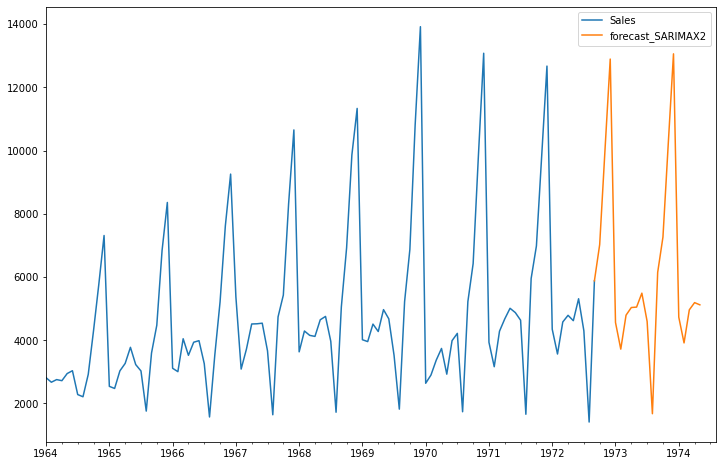

In [148]:
future_df[['Sales','forecast_SARIMAX2']].plot(figsize=(12,8))